Contoh explorasi data yang menggambarkan sesuartu dari waktu ke waktu atau periode secara historis

In [1]:
!pip install pandas matplotlib

# Step 1: install library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# upload contoh data pada komputer dan tampilkan 5 data awal
from google.colab import files
uploaded = files.upload()

# membaca file excel yang sudah diupload
import io
df = pd.read_excel(io.BytesIO(uploaded['tourism_visitor_data.xlsx']))

# Display the first few rows of the data
df.head()


Saving tourism_visitor_data.xlsx to tourism_visitor_data.xlsx


,Date,Location,Visitors
0,2023-04-01,Yogyakarta,561
1,2023-04-02,Medan,728
2,2023-04-03,Malang,118
3,2023-04-04,Surabaya,948
4,2023-04-05,Bandung,532


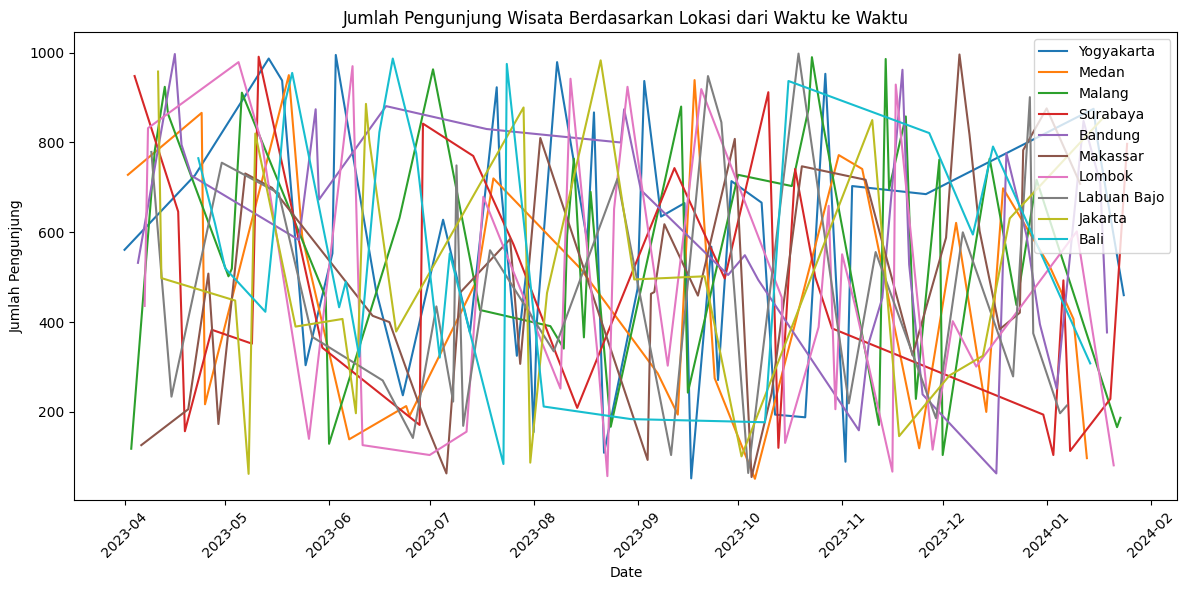

In [3]:
# contoh menampilkan time series pada data diatas
df['Date'] = pd.to_datetime(df['Date'])

#  Group data 'Location' and plot the visitor trends over time
plt.figure(figsize=(12, 6))

for location in df['Location'].unique():
    location_data = df[df['Location'] == location]
    plt.plot(location_data['Date'], location_data['Visitors'], label=location)

# menambahkan judul dan label
plt.title('Jumlah Pengunjung Wisata Berdasarkan Lokasi dari Waktu ke Waktu')
plt.xlabel('Date')
plt.ylabel('Jumlah Pengunjung')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

#  Tampilkan visualisasi
plt.tight_layout()
plt.show()

In [4]:
# terlihat dari data diatas masih susah dibaca karena kita langsung menampilkan data berdasarkan dataset.
#berikut modifikasi jika ditampilkan dalam format minggu

# memastikan variable Data adalah format Data
df['Date'] = pd.to_datetime(df['Date'])

# membuat kolom untuk menampung minggu
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)

# Kelompokkan data berdasarkan 'Minggu' dan 'Lokasi' dan jumlahkan pengunjung untuk setiap minggu
weekly_data = df.groupby(['Week', 'Location'])['Visitors'].sum().reset_index()

# Menampilkan beberapa baris pertama data mingguan
weekly_data.head()


,Week,Location,Visitors
0,2023-03-27,Medan,728
1,2023-03-27,Yogyakarta,561
2,2023-04-03,Bandung,532
3,2023-04-03,Labuan Bajo,779
4,2023-04-03,Lombok,1268


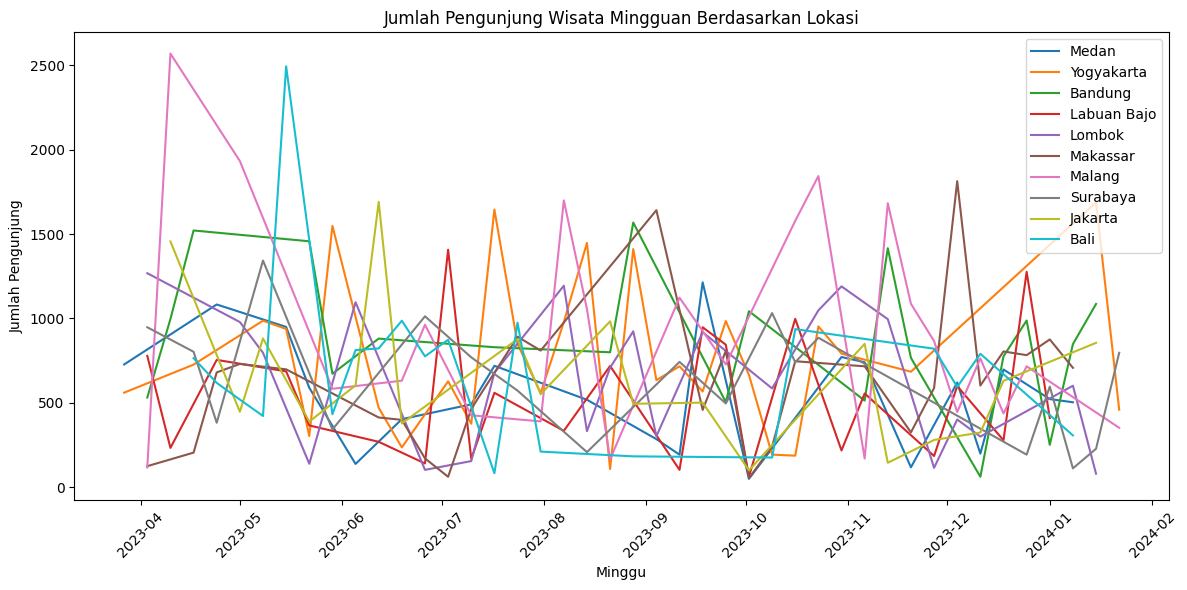

In [9]:
# Plotkan data yang dikelompokkan berdasarkan minggu untuk setiap lokasi
plt.figure(figsize=(12, 6))

for location in weekly_data['Location'].unique():
    location_data = weekly_data[weekly_data['Location'] == location]
    plt.plot(location_data['Week'], location_data['Visitors'], label=location)

# menambahkan judul dan label
plt.title('Jumlah Pengunjung Wisata Mingguan Berdasarkan Lokasi')
plt.xlabel('Minggu')
plt.ylabel('Jumlah Pengunjung')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# tampilkan visualisasi
plt.tight_layout()
plt.show()


In [10]:
# menampilkan time series pada suatu wilayah saja (misalnya di Bali)
df['Date'] = pd.to_datetime(df['Date'])

# Filter data untuk hanya memasukkan Bali
bali_data = df[df['Location'] == 'Bali']

# Buat kolom baru untuk minggu ini
bali_data['Week'] = bali_data['Date'].dt.to_period('W').apply(lambda r: r.start_time)

# Kelompokkan data berdasarkan 'Mingguan' dan jumlahkan pengunjung setiap minggu di Bali
bali_weekly_data = bali_data.groupby('Week')['Visitors'].sum().reset_index()

# Menampilkan beberapa baris pertama data mingguan Bali
bali_weekly_data.head()


<ipython-input-10-1dc299be9c46>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bali_data['Week'] = bali_data['Date'].dt.to_period('W').apply(lambda r: r.start_time)


,Week,Visitors
0,2023-04-17,765
1,2023-04-24,619
2,2023-05-01,520
3,2023-05-08,423
4,2023-05-15,2493


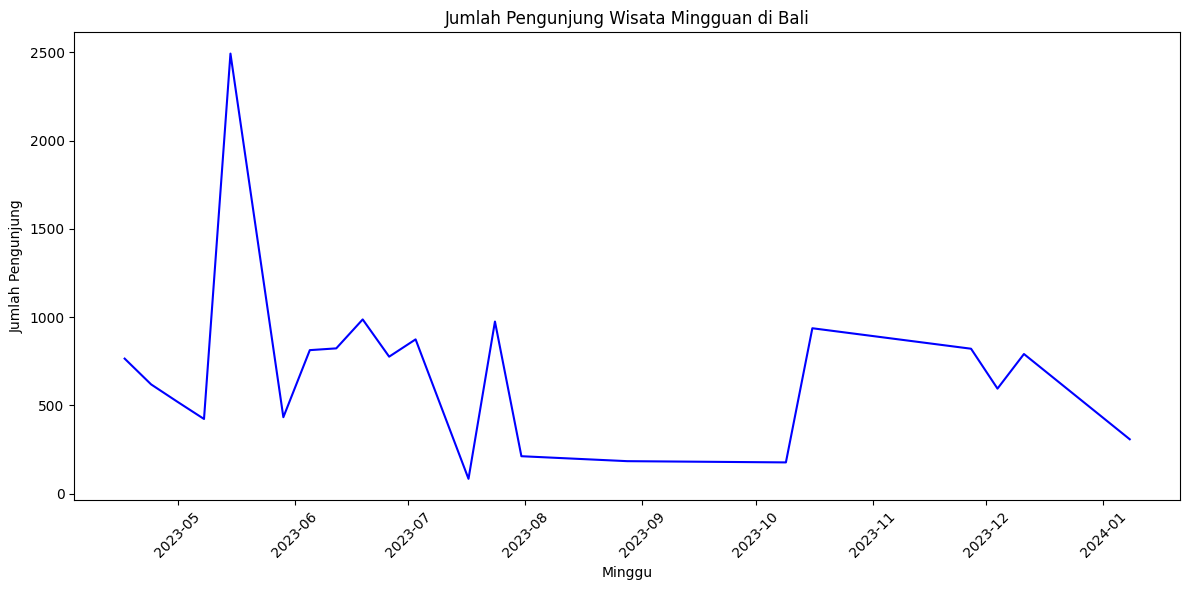

In [12]:
# Plot jumlah pengunjung mingguan untuk Bali
plt.figure(figsize=(12, 6))

# Plotting Bali data
plt.plot(bali_weekly_data['Week'], bali_weekly_data['Visitors'], label='Bali', color='blue')

# tambahkan judul dan label
plt.title('Jumlah Pengunjung Wisata Mingguan di Bali')
plt.xlabel('Minggu')
plt.ylabel('Jumlah Pengunjung')
plt.xticks(rotation=45)

# Step 7: Show the plot
plt.tight_layout()
plt.show()
